In [345]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pickle
from datetime import datetime, timedelta

OVERVIEW

In [456]:
final = pd.read_pickle('data/final_data.pkl')

In [461]:
spn_4094 = final.loc[final['spn'] == 4094]

In [453]:
group_4094 = grouped_data.get_group(4094)
group_4094

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,timeSinceDerate,timeUntilDerate
75,521561,10215935,2016-07-07 09:21:06,Low (Severity Medium) NOx limits exceeded due ...,PC4__1284P4C_2*,6U13D13,MX,PCAR,0,4094,...,2047.0,False,NaN,64.97212,NaN,72.4,10.73,Derate,NaT,5 days 09:50:01
15533,214072,4776571,2015-09-23 04:36:59,Condition Exists NOx limits exceeded due to In...,04993120*00000194*042114185815*07700062*I0*BBZ*,79452482,6X1u10D1500000000,CMMNS,0,4094,...,18431.0,False,NaN,54.52532,NaN,NaN,12.18,Derate,81 days 09:26:24,0 days 05:51:30
64485,36669,2132464,2015-04-28 12:24:18,Condition Exists NOx limits exceeded due to In...,unknown,unknown,unknown,unknown,0,4094,...,18431.0,False,NaN,65.27310,3276.75,NaN,9.57,No Derate,NaT,NaT
68711,221381,4898668,2015-09-29 13:49:03,Condition Exists NOx limits exceeded due to In...,04993120*00053727*082113134117*07700053*I0*BBZ*,79486888,6X1u10D1500000000,CMMNS,0,4094,...,2047.0,NaN,NaN,64.56435,NaN,NaN,13.63,Derate,NaT,11 days 23:27:11
79745,320996,6463357,2015-12-21 18:04:12,Condition Exists NOx limits exceeded due to In...,04993120*00000708*042114185815*07700062*I0*BBZ*,79520866,6X1u10D1500000000,CMMNS,0,4094,...,2047.0,NaN,NaN,67.03042,NaN,NaN,4.93,Derate,NaT,78 days 20:28:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536711,1050210,59576357,2018-08-25 06:14:41,Low (Severity Medium) NOx limits exceeded due ...,PC4__1284P4C_6*,Y049568,MX16U13D13,PCAR,0,4094,...,18431.0,True,NaN,0.00000,NaN,0.0,0.29,No Derate,NaT,NaT
538961,1024124,51665258,2018-06-11 09:51:13,Condition Exists NOx limits exceeded due to In...,05317106*04314381*061416133136*09401561*G1*BDR*,79831392,6X1u13D1500000000,CMMNS,0,4094,...,18431.0,False,NaN,66.94304,NaN,100.0,14.21,Derate,NaT,0 days 07:44:43
538994,1042149,57058401,2018-08-02 03:51:25,Condition Exists NOx limits exceeded due to In...,05317106*04336247*061416133136*09401561*G1*BDR*,79840502,6X1u13D1500000000,CMMNS,0,4094,...,18431.0,False,NaN,38.75803,NaN,100.0,24.65,No Derate,NaT,NaT
548438,1053427,60808479,2018-09-06 10:50:43,Condition Exists NOx limits exceeded due to In...,05317106*04075152*092613211021*09300006*G1*BDR*,79731935,6X1u13D1500000000,CMMNS,0,4094,...,2047.0,False,NaN,64.88474,NaN,0.0,16.24,Derate,NaT,1 days 00:31:57


In [454]:
# There are a total of 217 spn_4094 fault codes in our dataset
# 89 of those spn_4094s was unrelated to a derate while 128 spn_4094s were related to derates
# 0.5898617511520737 of the time there was a spn_4049 there was a derate

In [464]:

no_derate_count = spn_4094.loc[spn_4094['derate'] == 'No Derate'].shape[0]
derate_count = spn_4094.loc[spn_4094['derate'] == 'Derate'].shape[0]

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y=['Derate', 'No Derate'],
    x=[derate_count, no_derate_count],
    textposition='auto',
    marker={'color': ['rgb(255, 102, 102)', 'rgb(102, 178, 255)'], 'line': {'width': 0}}))

fig.update_layout(title='SPN_4094 Derate vs SPN_4094 No Derate Counts',
                  title_x= 0.5)

fig.show()

In [467]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['No Derate', 'Derate'],
    y=[no_temp_avg, y_temp_avg],
    name='Engine Oil Temperature'
))

fig.add_trace(go.Bar(
    x=['No Derate', 'Derate'],
    y=[no_pressure_avg, y_pressure_avg],
    name='Engine Oil Pressure'
))

fig.update_layout(
    title="Average Engine Oil Temperature and Pressure",
    title_x=0.5
)

fig.show()

In [417]:
#spn_4094.loc[spn_4094['derate'] ==  'No Derate']

In [348]:
no_temp_avg = spn_4094.loc[spn_4094['derate'] == 'No Derate','EngineOilTemperature'].mean()
no_temp_avg

218.4529460674157

In [349]:
y_temp_avg = spn_4094.loc[spn_4094['derate'] == 'Derate','EngineOilTemperature'].mean()
y_temp_avg 

205.33017401574804

In [350]:
no_pressure_avg = spn_4094.loc[spn_4094['derate'] == 'No Derate','EngineOilPressure'].mean()
no_pressure_avg

40.08516842696629

In [351]:
y_pressure_avg = spn_4094.loc[spn_4094['derate'] == 'Derate','EngineOilPressure'].mean()
y_pressure_avg 

43.0196875

<AxesSubplot:xlabel='EquipmentID'>

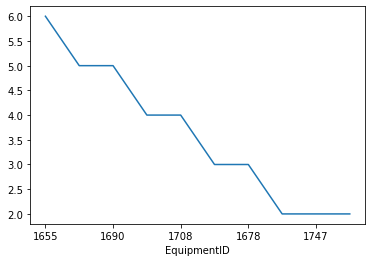

In [324]:
# top 10 that had 4094 codes but No Derate

spn_4094.loc[spn_4094['derate'] == 'No Derate', 'EquipmentID'].value_counts().head(10).plot()

<AxesSubplot:xlabel='EquipmentID'>

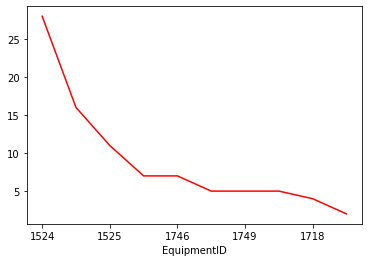

In [325]:
# top 10 that had 4049 codes that had a Derate


spn_4094.loc[spn_4094['derate'] == 'Derate', 'EquipmentID'].value_counts().head(10).plot(color = 'red')

In [326]:
derate = spn_4094.loc[spn_4049['derate'] == 'Derate']

In [327]:
no_derate = spn_4094.loc[spn_4094['derate'] == 'No Derate']

In [328]:
derate_df = derate[['spn','EngineOilTemperature', 
                    'EngineOilPressure','EventTimeStamp',
                    'timeUntilDerate','timeSinceDerate','EquipmentID']]

In [329]:
no_derate_df = no_derate[['spn','EngineOilTemperature', 
                          'EngineOilPressure','EventTimeStamp',
                          'timeUntilDerate','timeSinceDerate','EquipmentID']]

In [330]:
derate_df['time_seconds'] = derate_df['timeUntilDerate'].dt.total_seconds()

C:\Users\tjsim\AppData\Local\Temp\ipykernel_38308\997947731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derate_df['time_seconds'] = derate_df['timeUntilDerate'].dt.total_seconds()


In [331]:
derate_df['time_seconds'] = derate_df['time_seconds'].astype(float)

C:\Users\tjsim\AppData\Local\Temp\ipykernel_38308\2808592401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derate_df['time_seconds'] = derate_df['time_seconds'].astype(float)


In [332]:
derate_df['time_seconds'].mean()/3600/24

19.817121447956577

In [333]:
derate_df

,spn,EngineOilTemperature,EngineOilPressure,EventTimeStamp,timeUntilDerate,timeSinceDerate,EquipmentID,time_seconds
15533,4094,212.2813,33.06,2015-09-23 04:36:59,0 days 05:51:30,81 days 09:26:24,1366,21090.0
68711,4094,228.5938,35.38,2015-09-29 13:49:03,11 days 23:27:11,NaT,1472,1034831.0
80362,4094,209.0750,50.46,2015-12-10 10:58:47,0 days 00:00:00,NaT,1524,0.0
79745,4094,210.9875,38.86,2015-12-21 18:04:12,78 days 20:28:30,NaT,1519,6812910.0
82729,4094,213.0688,56.84,2016-01-04 17:45:19,0 days 00:00:01,NaT,1535,1.0
...,...,...,...,...,...,...,...,...
361473,4094,188.0375,50.46,2019-01-06 21:08:17,NaT,417 days 05:14:41,1749,NaN
361504,4094,188.0375,58.00,2019-02-09 23:12:46,NaT,451 days 07:19:10,1749,NaN
356008,4094,208.0063,60.90,2019-04-14 13:33:23,NaT,888 days 01:52:24,1745,NaN
353749,4094,213.7437,40.02,2019-04-24 10:01:24,NaT,1271 days 20:45:41,1742,NaN


In [334]:
#no_derate_df

In [425]:
# looking at only time until derate occurrs, as the days close in on derate spn_4049 events occur more frequently. 

until_freq_by_day = derate_df.loc[derate_df['timeUntilDerate'] <= '75 days']
until_freq_by_day

,spn,EngineOilTemperature,EngineOilPressure,EventTimeStamp,timeUntilDerate,timeSinceDerate,EquipmentID,time_seconds
15533,4094,212.2813,33.06,2015-09-23 04:36:59,0 days 05:51:30,81 days 09:26:24,1366,21090.0
68711,4094,228.5938,35.38,2015-09-29 13:49:03,11 days 23:27:11,NaT,1472,1034831.0
80362,4094,209.0750,50.46,2015-12-10 10:58:47,0 days 00:00:00,NaT,1524,0.0
82729,4094,213.0688,56.84,2016-01-04 17:45:19,0 days 00:00:01,NaT,1535,1.0
82733,4094,214.1375,55.68,2016-01-05 17:08:17,0 days 18:25:25,0 days 00:00:00,1535,66325.0
...,...,...,...,...,...,...,...,...
548438,4094,215.9937,38.28,2018-09-06 10:50:43,1 days 00:31:57,NaT,306,88317.0
548440,4094,212.2813,38.28,2018-09-07 05:48:43,0 days 05:33:57,NaT,306,20037.0
358085,4094,226.9063,49.30,2018-10-04 18:48:26,0 days 08:07:05,NaT,1748,29225.0
316731,4094,217.2875,37.70,2018-11-12 17:32:18,0 days 03:37:01,NaT,1683,13021.0


In [510]:
days_range = [75, 50, 25, 0,] # looking at about 6 months out
#colors = ['#FF8C00', '#FF7F50'] #'#FFD700', '#FFA500',

# Filter the DataFrame by each day in the range
data_frames = []
for days in days_range:
    until_freq_by_day = derate_df.loc[derate_df['timeUntilDerate'] <= f'{days} days']
    data_frames.append(until_freq_by_day)

# Create a list of the trace objects for the chart
traces = []
for i, days in enumerate(days_range):
    trace = go.Bar(
        x=[len(data_frames[i])],
        y=[f"{days} days"],
        orientation='h',
        name=f'{days} days',
        marker=dict(color= '#FF8C00', line = dict(color='grey', width = 2)) # set the bar color to orange
    )
    traces.append(trace)

# Define the layout for the chart
layout = go.Layout(
    barmode='stack', 
    title='Time Until Derate',
    xaxis=dict(
        title='SPN_4094',
        showgrid=False
    ),
    yaxis=dict(
        title='Days Until Derate',
        showgrid=False
    )
)

# Define the data for the chart
data = go.Figure(data=traces, layout=layout)

# Calculate SPN_4094 counts and percentages for each day in the range
spn_4094_counts = []
spn_4094_percentages = []
for days in days_range:
    until_freq_by_day = derate_df.loc[derate_df['timeUntilDerate'] <= f'{days} days']
    spn_4094_count = len(until_freq_by_day[until_freq_by_day['spn'] == 4094])
    spn_4094_counts.append(spn_4094_count)
    spn_4094_percentages.append(spn_4094_count / 128 * 100)

# Create the table
table_trace = go.Table(
    header=dict(values=['Days Until Derate', 'SPN_4094 Count', 'SPN_4094 Percentage']),
    cells=dict(
        values=[days_range, spn_4094_counts, spn_4094_percentages],
        align='right'
    ),
    header_align=['right']
)

# Define the layout for the table
table_layout = go.Layout(
    title='Days Until Derate by SPN_4094',
    margin=dict(l=50, r=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Define the data for the table
table_data = [table_trace]

# Create the table figure
table_figure = go.Figure(data=table_data, layout=table_layout)

# Display both the chart and the table
data.show()
table_figure.show()



In [433]:
until_freq_by_day[['EngineOilPressure','EngineOilTemperature']].mean()

EngineOilPressure        46.212903
EngineOilTemperature    206.676211
dtype: float64

In [339]:
n_temp_avg = spn_4094.loc[spn_4094['derate'] == 'No Derate','EngineOilTemperature'].mean()
n_temp_avg

218.4529460674157

In [340]:
spn_4094['EngineOilTemperature'].mean()

210.73724212962958

In [342]:
until_freq_by_day

,spn,EngineOilTemperature,EngineOilPressure,EventTimeStamp,timeUntilDerate,timeSinceDerate,EquipmentID,time_seconds
15533,4094,212.2813,33.06,2015-09-23 04:36:59,0 days 05:51:30,81 days 09:26:24,1366,21090.0
68711,4094,228.5938,35.38,2015-09-29 13:49:03,11 days 23:27:11,NaT,1472,1034831.0
80362,4094,209.0750,50.46,2015-12-10 10:58:47,0 days 00:00:00,NaT,1524,0.0
82729,4094,213.0688,56.84,2016-01-04 17:45:19,0 days 00:00:01,NaT,1535,1.0
82733,4094,214.1375,55.68,2016-01-05 17:08:17,0 days 18:25:25,0 days 00:00:00,1535,66325.0
...,...,...,...,...,...,...,...,...
548438,4094,215.9937,38.28,2018-09-06 10:50:43,1 days 00:31:57,NaT,306,88317.0
548440,4094,212.2813,38.28,2018-09-07 05:48:43,0 days 05:33:57,NaT,306,20037.0
358085,4094,226.9063,49.30,2018-10-04 18:48:26,0 days 08:07:05,NaT,1748,29225.0
316731,4094,217.2875,37.70,2018-11-12 17:32:18,0 days 03:37:01,NaT,1683,13021.0


In [105]:
# Interesting -- looking at timeframes of 7 days or less all 4049 were derates

In [106]:
# looking at oil pressure and temp for timeframes less than 7 days until derate
week.loc[week['derate'] == 'No Derate']

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,timeSinceDerate,timeUntilDerate


In [ ]:
week_avg= week.loc[week['derate'] == 'No Derate','EngineOilTemperature'].mean()